In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/9 [==>...........................] - ETA: 3s - loss: 1.3501 - accuracy: 0.2188
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 1s 39ms/step - loss: 1.2596 - accuracy: 0.2476 - val_loss: 1.1149 - val_accuracy: 0.2550
Epoch 2/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.2306 - accuracy: 0.2344
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 1.1519 - accuracy: 0.2715 - val_loss: 1.0403 - val_accuracy: 0.3123
Epoch 3/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.0639 - accuracy: 0.3516
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 1.0791 - accuracy: 0.3461 - val_loss: 0.9818 - val_accuracy: 0.5931
Epoch 4/1000
1/9 [==>...........................] - ETA: 0s - loss: 1.0577 - accuracy: 0.3672
Epoch 4: savin

9/9 [==============================] - 0s 18ms/step - loss: 0.5875 - accuracy: 0.8088 - val_loss: 0.3461 - val_accuracy: 0.9513
Epoch 29/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.8125
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.5668 - accuracy: 0.8088 - val_loss: 0.3326 - val_accuracy: 0.9484
Epoch 30/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5621 - accuracy: 0.7969
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 8ms/step - loss: 0.5633 - accuracy: 0.8040 - val_loss: 0.3181 - val_accuracy: 0.9456
Epoch 31/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.8750
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.5346 - accuracy: 0.8298 - val_loss: 0.293

Epoch 56/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8594
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.3745 - accuracy: 0.8671 - val_loss: 0.1260 - val_accuracy: 0.9771
Epoch 57/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3119 - accuracy: 0.9141
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.3856 - accuracy: 0.8566 - val_loss: 0.1249 - val_accuracy: 0.9771
Epoch 58/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3478 - accuracy: 0.8984
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.3301 - accuracy: 0.8901 - val_loss: 0.1264 - val_accuracy: 0.9771
Epoch 59/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.8438
Epoch 59

9/9 [==============================] - 0s 8ms/step - loss: 0.3239 - accuracy: 0.8910 - val_loss: 0.0889 - val_accuracy: 0.9828
Epoch 84/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3061 - accuracy: 0.9219
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 5ms/step - loss: 0.2857 - accuracy: 0.9025 - val_loss: 0.0865 - val_accuracy: 0.9857
Epoch 85/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2784 - accuracy: 0.8906
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2782 - accuracy: 0.9063 - val_loss: 0.0823 - val_accuracy: 0.9857
Epoch 86/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8594
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.8987 - val_loss: 0.0787

Epoch 111/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2588 - accuracy: 0.9219
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2507 - accuracy: 0.9149 - val_loss: 0.0681 - val_accuracy: 0.9943
Epoch 112/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3482 - accuracy: 0.8672
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2725 - accuracy: 0.9034 - val_loss: 0.0641 - val_accuracy: 0.9943
Epoch 113/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2878 - accuracy: 0.8906
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2832 - accuracy: 0.8967 - val_loss: 0.0659 - val_accuracy: 0.9914
Epoch 114/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3023 - accuracy: 0.8906
E

1/9 [==>...........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8906
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2347 - accuracy: 0.9140 - val_loss: 0.0556 - val_accuracy: 0.9943
Epoch 139/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8828
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2463 - accuracy: 0.9197 - val_loss: 0.0581 - val_accuracy: 0.9943
Epoch 140/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1926 - accuracy: 0.9141
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2569 - accuracy: 0.9044 - val_loss: 0.0579 - val_accuracy: 0.9943
Epoch 141/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.9297
Epoch 141: savin

1/9 [==>...........................] - ETA: 0s - loss: 0.2803 - accuracy: 0.9141
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2275 - accuracy: 0.9159 - val_loss: 0.0564 - val_accuracy: 0.9943
Epoch 166/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2510 - accuracy: 0.9453
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 7ms/step - loss: 0.2382 - accuracy: 0.9254 - val_loss: 0.0563 - val_accuracy: 0.9943
Epoch 167/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.2183 - accuracy: 0.9453
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
9/9 [==============================] - 0s 6ms/step - loss: 0.2780 - accuracy: 0.9101 - val_loss: 0.0580 - val_accuracy: 0.9943
Epoch 168/1000
1/9 [==>...........................] - ETA: 0s - loss: 0.1739 - accuracy: 0.9297
Epoch 168: savin

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9943


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 68ms/step
[0.23751356 0.09779601 0.6646905 ]
2


# 混同行列

11/11 [==============================] - 0s 898us/step


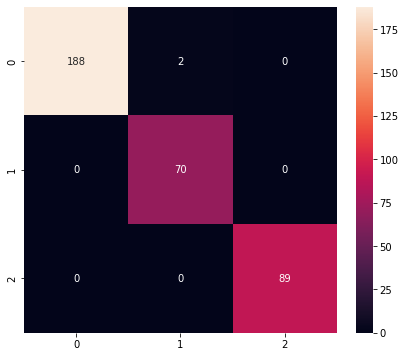

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       190
           1       0.97      1.00      0.99        70
           2       1.00      1.00      1.00        89

    accuracy                           0.99       349
   macro avg       0.99      1.00      0.99       349
weighted avg       0.99      0.99      0.99       349



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\benny\AppData\Local\Temp\tmpfftljumm\assets


6444

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.23751351 0.09779598 0.6646906 ]
2
